---------------------------

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [17]:
os.chdir("C:\\Users\\DILIP\\Downloads")

names = ['batting_average', 'runs_scored', 'doubles_at_bat', 'triples_at_bat', 'home_runs','strike_outs']

ad_data = pd.read_csv("baseballs.csv",names=names)
ad_data.head()

,batting_average,runs_scored,doubles_at_bat,triples_at_bat,home_runs,strike_outs
0,0.283,0.144,0.049,0.012,0.013,0.086
1,0.276,0.125,0.039,0.013,0.002,0.062
2,0.281,0.141,0.045,0.021,0.013,0.074
3,0.328,0.189,0.043,0.001,0.030,0.032
4,0.290,0.161,0.044,0.011,0.070,0.076


In [18]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
batting_average    45 non-null float64
runs_scored        45 non-null float64
doubles_at_bat     45 non-null float64
triples_at_bat     45 non-null float64
home_runs          45 non-null float64
strike_outs        45 non-null float64
dtypes: float64(6)
memory usage: 2.2 KB


In [19]:
ad_data.describe()

,batting_average,runs_scored,doubles_at_bat,triples_at_bat,home_runs,strike_outs
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.280467,0.150889,0.046356,0.011289,0.024267,0.104333
std,0.044002,0.042009,0.010452,0.006960,0.022260,0.063057
min,0.188000,0.064000,0.025000,0.001000,0.000000,0.000000
25%,0.248000,0.119000,0.039000,0.007000,0.009000,0.062000
50%,0.290000,0.150000,0.045000,0.009000,0.013000,0.095000
75%,0.308000,0.189000,0.053000,0.016000,0.039000,0.138000
max,0.367000,0.259000,0.068000,0.030000,0.085000,0.264000


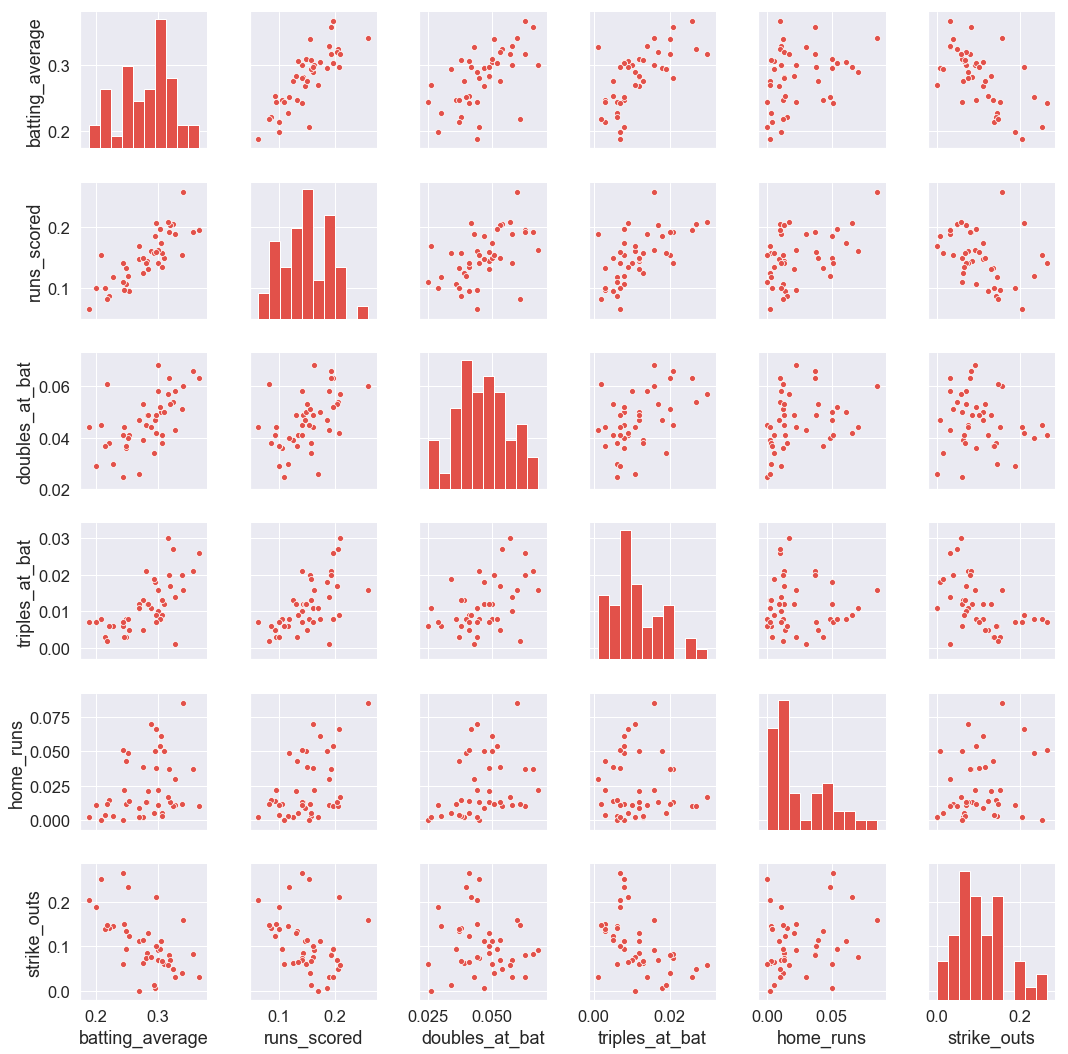

In [20]:
p = sns.pairplot(ad_data)

#  Assumptions to be checked for Linear Regression

## Linearity

 ### Linear regression needs the relationship between the independent and dependent variables to be linear.  Let's use a pair plot to check the relation of independent variables with the Monthly_HH_Expense variable.

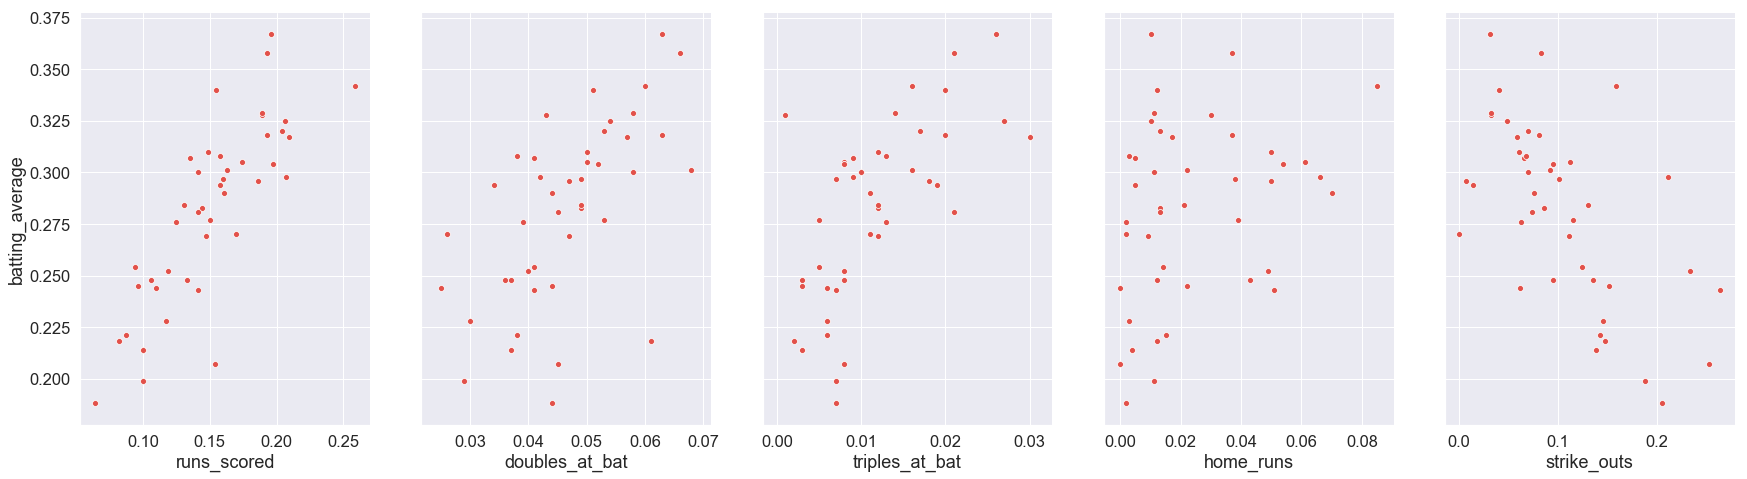

In [21]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(ad_data, x_vars=['runs_scored', 'doubles_at_bat', 'triples_at_bat', 'home_runs','strike_outs'], y_vars= 'batting_average', size=7, aspect=0.7)

### By looking at the plots we can see that with the batting_average variable  most of the independent variables form an accurately linear shape but 'home_runs' do still better than 'strike_outs' which seems to hardly have any specific shape. So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc. 



### Now rest of the assumptions require us to perform the regression before we can even check for them. So let's perform regression on it.

In [25]:
x = ad_data.drop(["batting_average"],axis=1)
y = ad_data.batting_average

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)

In [29]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))

R squared: 0.860127109323749


## Mean of Residuals

### Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero.

In [30]:
residuals = y.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -4.5642502123478656e-17


### Very close to zero so all good here.

## Homoscedasticity

### Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

### Detecting heteroscedasticity
Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

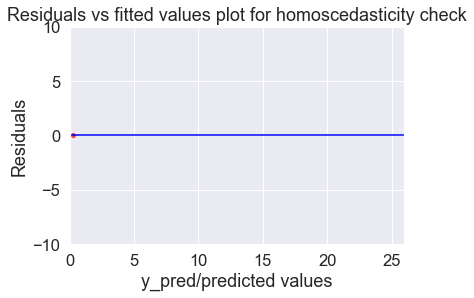

In [33]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

##  Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.
* Null Hypothesis: Error terms are homoscedastic
* Alternative Hypothesis: Error terms are heteroscedastic.

In [34]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 0.5498487747620252), ('p-value', 0.8879983647242132)]

### Since p value is more than 0.05 , we can't reject the null hypothesis, error terms are homoscedastic. Good.

## Check for Normality of error terms/residuals

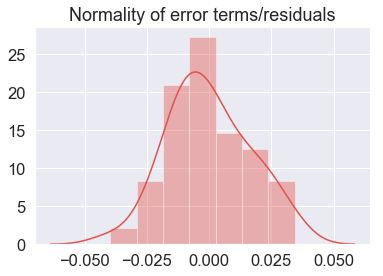

In [37]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

### The residual terms are normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal.No skew is visible from the plot.

## No autocorrelation of residuals

#### When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.

#### In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.

#### There should not be autocorrelation in the data so the error terms should not form any pattern.

### Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.
* Null Hypothesis: Autocorrelation is absent.
* Alternative Hypothesis: Autocorrelation is present.

In [43]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.18636075094145213

### Since p value is more than 0.05 we can't reject the null hypothesis, error terms are not autocorrelated. Good.

In [44]:
import statsmodels.api as sm

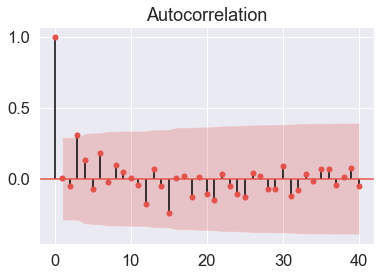

In [45]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

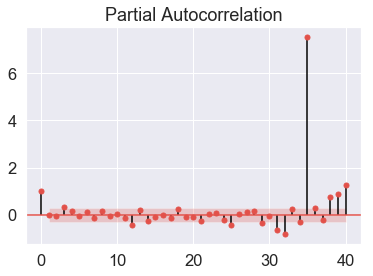

In [46]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

### The results show no signs of autocorelation.

## No perfect multicollinearity

### In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

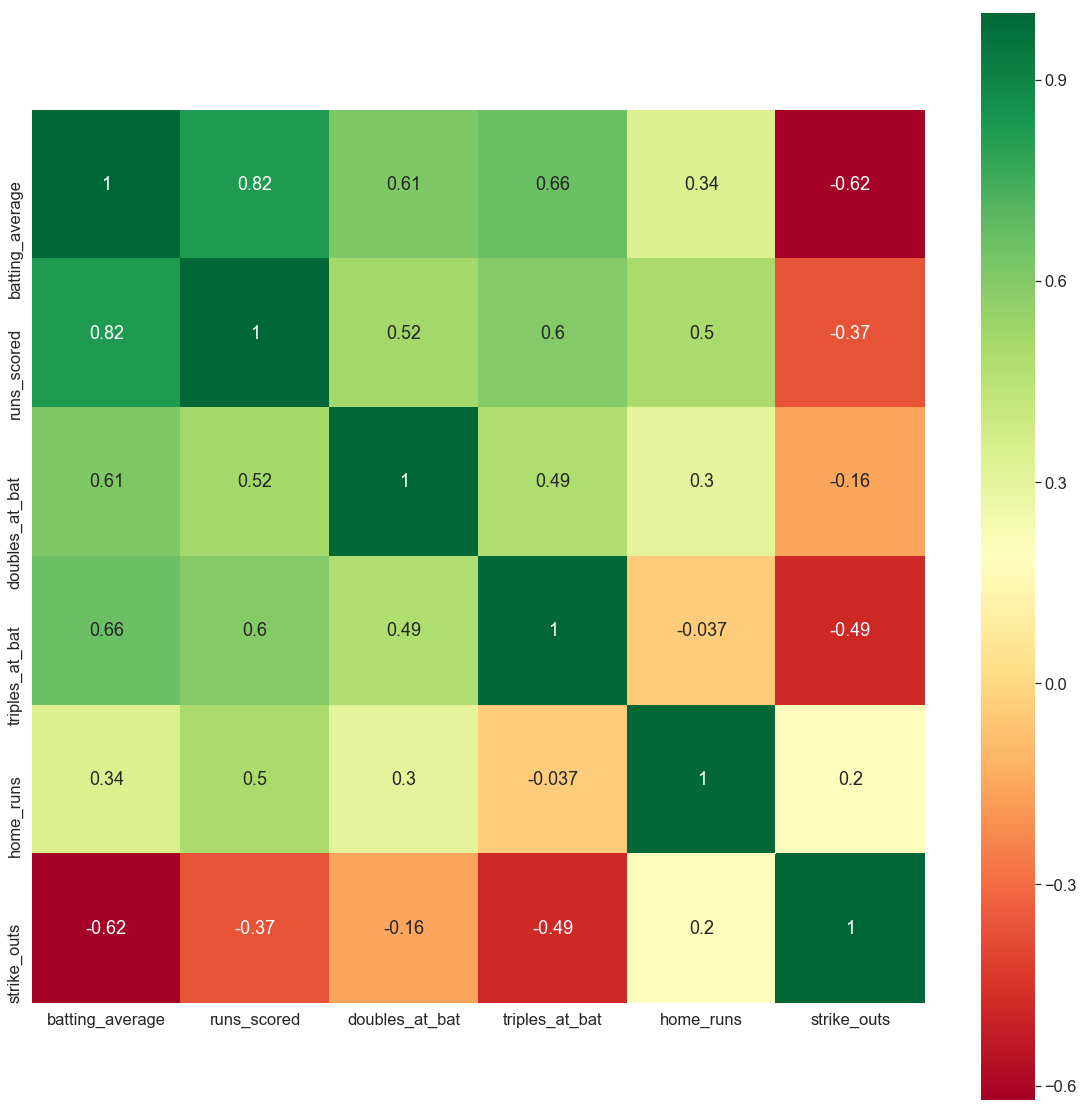

In [47]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [48]:
def VIF(formula,data):
    import pip #To install packages
    #pip.main(["install","dmatrices"])
    #pip.main(["install","statsmodels"])
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) \
       for i in range(X.shape[1])]
    vif["features"] = X.columns
    return(vif.round(1))

In [ ]:
'', '', '', '', '',''

In [49]:
VIF=VIF("batting_average ~ runs_scored+\
       doubles_at_bat+ triples_at_bat+\
       home_runs+strike_outs" ,data = ad_data)
VIF  

,VIF Factor,features
0,43.3,Intercept
1,3.1,runs_scored
2,1.5,doubles_at_bat
3,2.4,triples_at_bat
4,2.0,home_runs
5,1.5,strike_outs


### Analyze the magnitude of multicollinearity by considering the size of the VIF A rule of thumb is that if VIF  > 10 then multicollinearity is high.

In [65]:
import numpy as np
a = np.array([12, 14, 11,18,10.5,12,14,11,9])
np.percentile(a,75) - np.percentile(a,25)

3.0

In [62]:
def median(a, l, r): 
    n = r - l + 1
    n = (n + 1) // 2 - 1
    return n + l 
  
# Function to calculate IQR 
def IQR(a, n): 
  
    a.sort() 
  
    # Index of median of entire data 
    mid_index = median(a, 0, n) 
  
    # Median of first half 
    Q1 = a[median(a, 0, mid_index)] 
  
    # Median of second half 
    Q3 = a[median(a, mid_index + 1, n)] 
  
    # IQR calculation 
    return (Q3 - Q1) 
  
# Driver Function 
if __name__=='__main__': 
    a = [9,10.5,11,11,12,12,14,14,18]
    n = len(a) 
    print(IQR(a, n)) 

3


In [ ]:
9,10.5,11,11,12,12,14,14,18

In [67]:
9,10.5,11,11,12,12,14,14,18
a=(9,10.5,11,11)
b=(12,14,14,18)
np.median(b)-np.median(a)

In [69]:
np.median(b)-np.median(a)

3.25